#Loading libraries

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

#Loading Data

In [4]:
#Loading data
data = pd.read_csv('/content/Miles_Traveled.csv')

#Checking Data

In [5]:
#Checking data
data

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


The data consist of 49 years i.e.588 months.

#Checking data info

In [6]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


Date have object data type

#Changing the columns names

In [7]:
#Changing the name of columns
data.columns = ['ds', 'y']

#Changing data type of date as datetime format

In [8]:
#Changing the date into datetime
data['ds'] = pd.to_datetime(data['ds'])

In [9]:
#Checking the data type
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#Plotting the data

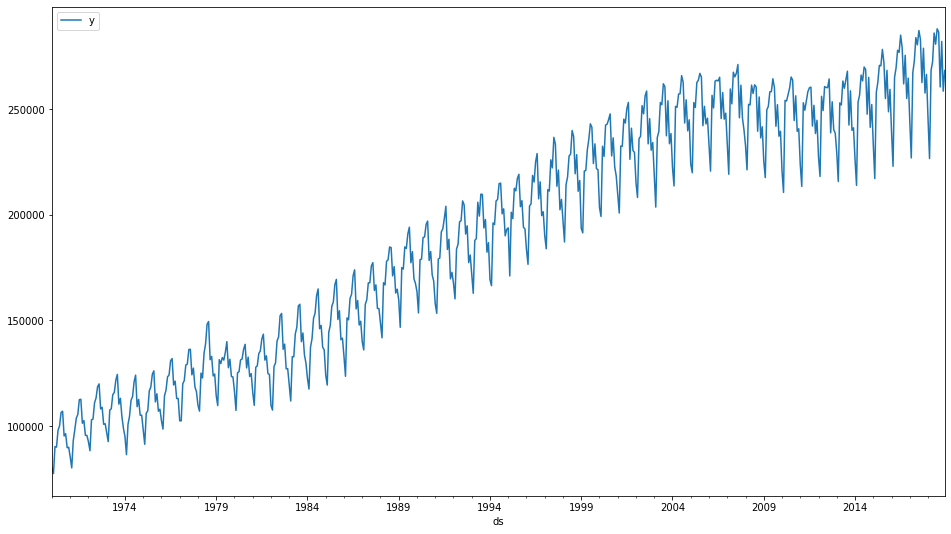

In [10]:
#Plotting the data
data.plot(x = 'ds', y = 'y', figsize = (16,9));

#Splitting data into train & test

In [11]:
#Checking the size of the data
data.shape

(588, 2)

In [12]:
#Splitting data into train and test
train = data[:576]
test = data[576:]
train.shape, test.shape

((576, 2), (12, 2))

#Creating Facebook Prophet Model

In [13]:
#Creating facebook prophat model with default parameters
m = Prophet()

#Fitting the model
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Forecasting on the model on next 12 months

In [14]:
#Creating dataframe for period
future = m.make_future_dataframe(periods=12, freq = 'MS')

#Forecasting on the data
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94381.078057,70003.608699,81576.739146,94381.078057,94381.078057,-18587.558897,-18587.558897,-18587.558897,-18587.558897,-18587.558897,-18587.558897,0.0,0.0,0.0,75793.519160
1,1970-02-01,94687.217925,61793.321183,72754.199502,94687.217925,94687.217925,-27343.846075,-27343.846075,-27343.846075,-27343.846075,-27343.846075,-27343.846075,0.0,0.0,0.0,67343.371850
2,1970-03-01,94963.731353,89918.182496,100322.535280,94963.731353,94963.731353,16.176699,16.176699,16.176699,16.176699,16.176699,16.176699,0.0,0.0,0.0,94979.908053
3,1970-04-01,95269.871221,89945.823541,100724.102250,95269.871221,95269.871221,148.612177,148.612177,148.612177,148.612177,148.612177,148.612177,0.0,0.0,0.0,95418.483398
4,1970-05-01,95566.135609,99371.728785,110881.267602,95566.135609,95566.135609,9820.595792,9820.595792,9820.595792,9820.595792,9820.595792,9820.595792,0.0,0.0,0.0,105386.731401


In [15]:
#Extracting columns
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [16]:
#Displaying 'ds', 'yhat_lower', 'yhat_upper', 'yhat'
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1970-01-01,70003.608699,81576.739146,75793.519160
1,1970-02-01,61793.321183,72754.199502,67343.371850
2,1970-03-01,89918.182496,100322.535280,94979.908053
3,1970-04-01,89945.823541,100724.102250,95418.483398
4,1970-05-01,99371.728785,110881.267602,105386.731401
...,...,...,...,...
595,2019-08-01,280286.167556,291276.394455,285637.866352
596,2019-09-01,261979.500155,273019.613013,267385.100033
597,2019-10-01,268663.576996,280049.217802,274737.093382
598,2019-11-01,255618.427138,266508.859279,261205.008814


#Visualizing the Actual data vs Forecast data

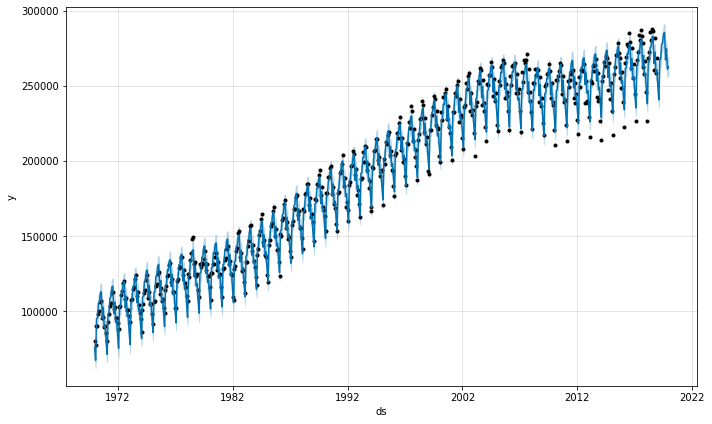

In [17]:
#Plotting data
m.plot(forecast);

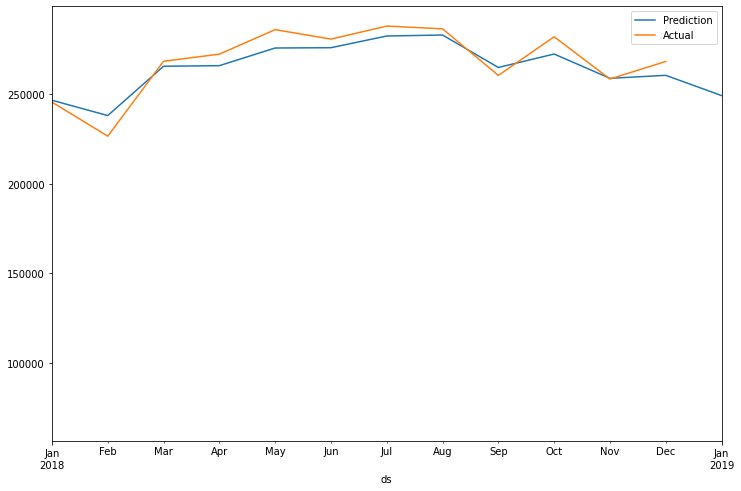

In [18]:
#Plotting actual and forecast the data
ax = forecast.plot(x = 'ds',
                   y = 'yhat',
                   label = 'Prediction',
                   legend = True,
                   figsize = (12,8));

test.plot(x = 'ds',
          y = 'y',
          label = 'Actual',
          legend = True,
          ax = ax,
          xlim = ('2018-01-01', '2019-01-01'));

#Evaluation of the peformance of the model

In [19]:
#Computing RMSE
pred = forecast.iloc[-12:]
rmse(test['y'], pred['yhat'])

6167.723581003236

In [20]:
#Computing mean
test['y'].mean()

268739.6666666667

#Cross Validation

In [37]:
#Cross validation in the model
initial = str(5*365)+' days'
period = str(5*365)+' days'
horizon = str(365)+' days'

cross_val = cross_validation(m,initial= initial, period = period,horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1977-12-11 00:00:00 and 2017-12-01 00:00:00


In [38]:
#Checking cross validation
cross_val.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1978-01-01,112522.801736,110915.920347,114197.942617,109838.0,1977-12-11
1,1978-02-01,108452.760395,106849.893359,110101.831401,107018.0,1977-12-11
2,1978-03-01,122874.803803,121278.158865,124393.136388,125035.0,1977-12-11
3,1978-04-01,125277.524169,123583.364265,126796.872039,122741.0,1977-12-11
4,1978-05-01,132901.360373,131356.936251,134572.830102,134427.0,1977-12-11


In [39]:
#Checking the length of the cv result
len(cross_val)

108

In [40]:
#Extracting the performance matrix
performance_metrics(cross_val)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,1.428687e+07,3779.798048,2829.041379,0.015635,0.013035,0.7
1,53 days,1.511269e+07,3887.504059,2953.833447,0.016707,0.013035,0.7
2,54 days,1.512318e+07,3888.852930,2957.262391,0.016532,0.012803,0.7
3,56 days,1.926494e+07,4389.184965,3590.411325,0.020414,0.016066,0.6
4,57 days,2.160395e+07,4648.004526,3849.666145,0.021644,0.021877,0.5
...,...,...,...,...,...,...,...
94,360 days,3.489549e+07,5907.240484,3503.308712,0.016107,0.010325,0.7
95,361 days,3.486607e+07,5904.749802,3470.706338,0.015937,0.010325,0.7
96,363 days,4.836505e+07,6954.498721,4246.412300,0.019077,0.010325,0.7
97,364 days,1.994963e+07,4466.500853,2599.982391,0.012111,0.006211,0.8


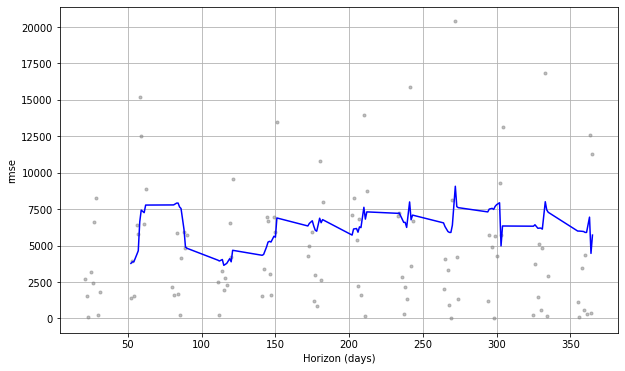

In [41]:
#Plotting RMSE
plot_cross_validation_metric(cross_val, metric='rmse');

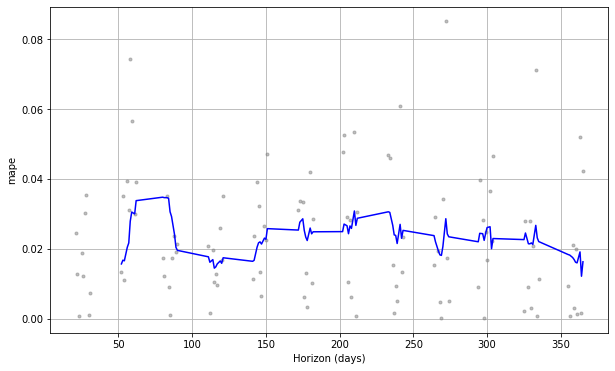

In [42]:
#Plotting MAPE
plot_cross_validation_metric(cross_val, metric='mape');